# Plotly Features 

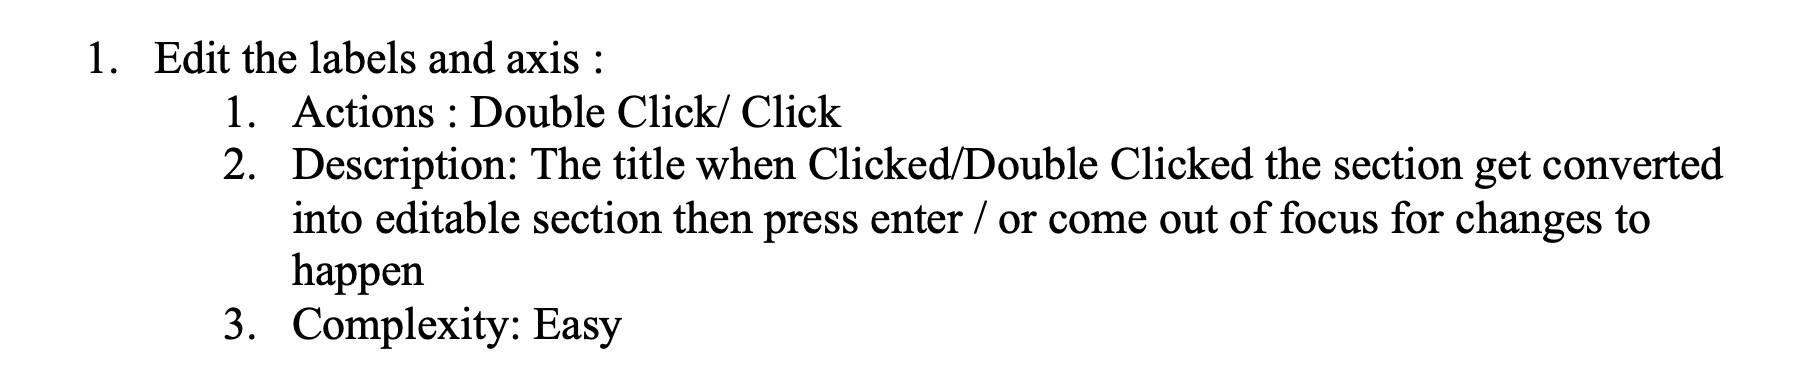
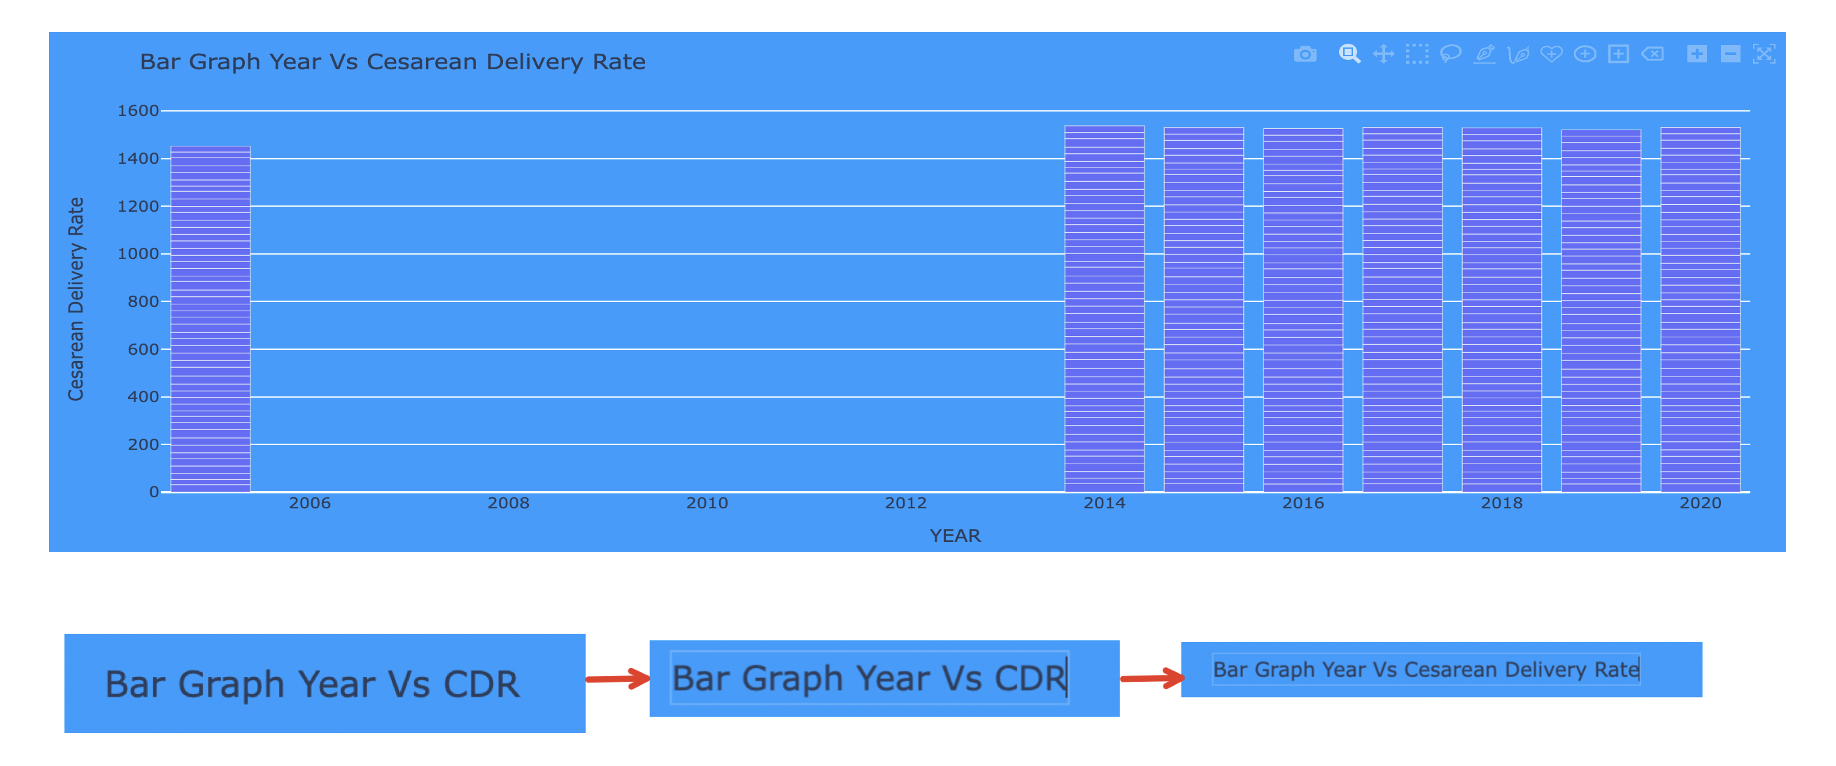
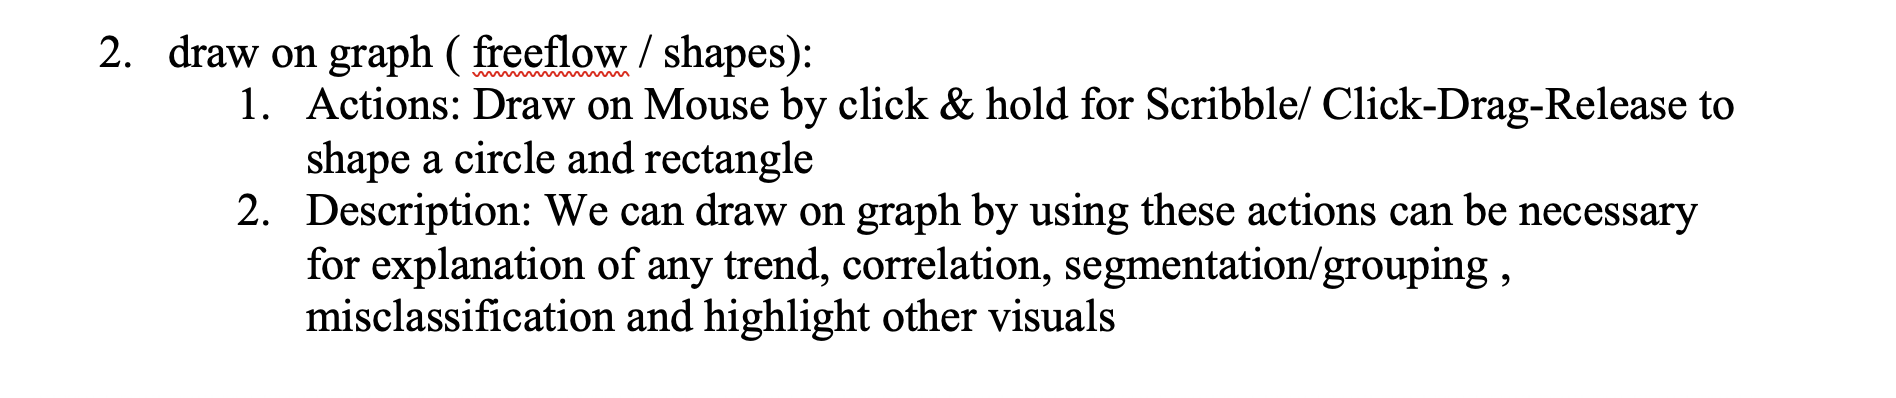
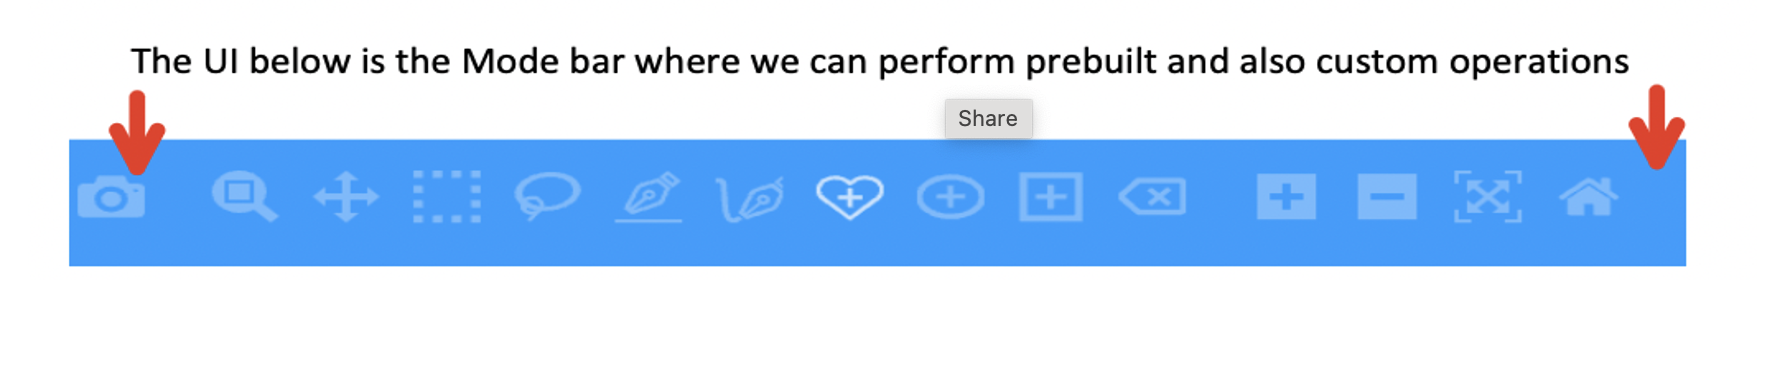

In [1]:
from dash import Dash, dcc, Output, Input
import dash_bootstrap_components as dbc
import plotly.express as px
import pandas as pd

df = pd.read_csv('./social_capital.csv')

app = Dash(__name__, external_stylesheets=[dbc.themes.CERULEAN])
mytitle = dcc.Markdown(children="Selectable Bargraph")
mygraph = dcc.Graph(figure={}, config={"editable": True,
                                       'modeBarButtonsToAdd': ['drawline',
                                                               'drawopenpath',
                                                               'drawclosedpath',
                                                               'drawcircle',
                                                               'drawrect',
                                                               'eraseshape',
                                                               # "resetViewMapbox"

                                                               ]
                                       })
drop_down = dcc.Dropdown(options=df.describe().columns[1:], value=df.describe().columns[1], clearable=False)

app.layout = dbc.Container([
    mytitle, mygraph, drop_down
])


@app.callback(
    Output(mygraph, component_property="figure"),
    Input(drop_down, component_property="value")
)
def update_drop_down(user_input):
    return px.bar(data_frame=df, x='YEAR', y=user_input)


if __name__ == "__main__":
    app.run_server()


1.  You can edit 
    - Title
    - X axis Label
    - Y axis Label
2. Draw
    - Circle
    - Rectangle
    - scribble
    - erase the shapes
    

    
    

# Toggle Section

In [4]:
from dash import Dash, dcc, Output, Input, html,State
import dash
import dash_bootstrap_components as dbc
import plotly.express as px
import dash_daq as daq
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('/Users/mg_0328/Documents/ContentMapping/untitled folder/PLOTLY DASH/social_capital.csv')

get_attribute={
    
    "edit":True,
    "color":{
        "Page Background Color":"paper_bgcolor",
        "Plot Background Color":"plot_bgcolor",
        "Font Color":"font_color",
        "Title Font Color":"title_font_color"
        
    }
    
}

graph_color=[
    {
        "color":{
            
        }
    }
]

app = Dash(__name__, external_stylesheets=[dbc.themes.CERULEAN])
dummy = dcc.Markdown(children="dummy")
mytitle = dcc.Markdown(children="Selectable Bargraph")
mygraph = dcc.Graph(
    id="graph_1",
    figure={},
    config={"editable": True,
            "editSelection": True
            },

)
bg_color_checkbox=dcc.Checklist(
    list(get_attribute["color"].keys()),
    ['Page Background Color',"Plot Background Color"]
)
color_picker = daq.ColorPicker(
    id='my-color-picker-1',
    label='Color Picker',
    value=dict(hex='#119DFF')
)
drop_down = dcc.Dropdown(options=df.describe().columns[1:], value=df.describe().columns[1], clearable=False)
app.layout = dbc.Container([
    mytitle,
    mygraph,
    drop_down,
    bg_color_checkbox,
    color_picker
])

def update_dictionary_for_same_values(key,values,color):
    mappings={}
    for i in values:
        mappings[key[i]]=color
    
    return mappings
    
    


@app.callback(
    Output(mygraph, component_property="figure"),
    Input(drop_down, component_property="value"),
    State(color_picker, component_property="value"),
    State(bg_color_checkbox,component_property="value")
)
def update_drop_down(user_input, color_name,checkbox_color):
#     print(color_name, "printing color")
    fig = px.bar(data_frame=df, x='YEAR', y=user_input)
#     print(checkbox_color)
    
    update_dict= update_dictionary_for_same_values(get_attribute['color'],checkbox_color,color_name["hex"])
    fig.update_layout(update_dict)
#     fig.update_layout({
#         "paper_bgcolor":color_name["hex"],
#         "plot_bgcolor":color_name["hex"]
#                           })
    return fig

@app.callback(
    Output(mygraph, component_property="figure",  allow_duplicate=True),
    Input(color_picker, component_property="value"),
    State(bg_color_checkbox,component_property="value"),
    State(mygraph,component_property="figure"),
     prevent_initial_call=True
)
def update_graph(color_name,checkbox_color,fig):
#     print(color_name)
    fig=go.Figure(fig)
    update_dict= update_dictionary_for_same_values(get_attribute['color'],checkbox_color,color_name["hex"])
    fig.update_layout(update_dict)
    return fig
    

if __name__ == "__main__":
    app.run_server(debug=True)

    